1st Machine Learning Project - start2impact - Davide Miglietta

# Wines Classification

The scope of this notebook is to recognize wines from 13 chemical and physical characteristics that have been measured. The dataset containing those properties can be found at: https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset.

**The features reported in the dataset are:**

* Alcohol
* Malic acid
* Ash
* Alcalinity of ash
* Magnesium
* Total phenols
* Flavanoids
* Nonflavanoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
* Proline

**And have been measured for 3 different kind of wines (class 0, class 1, class 2)**

## Table of contents:
1. [Libraries](#Libraries)


2. [Dataset_import_and_store](#Dataset_import_and_store)


3. [Data Exploration](#Data_Exploration)


4. [Data_Visualization](#Data_Visualization)


5. [Machine_Learning_Classification](#Machine_Learning_Classification)
    - [Data_Preparation_for_Classification](#Data_Preparation_for_Classification)
    - [Classifier_Choice](#Classifier_Choice)
    - [Hyperparameters_Tuning_with_GridSearch](#Hyperparameters_Tuning_with_GridSearch)
    
    
6. [Conclusions](#Conclusions)

### Libraries

In [1]:
#import libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#from scikit-learn
from sklearn.preprocessing import StandardScaler #for feature scaling
from sklearn.model_selection import train_test_split as split #split in train-test set
#ML model
#from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier

#model evalutaion metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#for hyperparameters tuning
from sklearn.model_selection import GridSearchCV


### Dataset_import_and_store

In [2]:
#import wine dataset from scikit learn
from sklearn.datasets import load_wine
wine_dataset = load_wine()

print(wine_dataset['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
wine_dataset

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

We need to estrapolate from the file:

* data in wine_dataset.data

* 'columns names' in wine_dataset.feature_names

* wine labels (target) in wine_dataset.target

In [4]:
#saving data in a pandas dataframe
wine_df = pd.DataFrame(wine_dataset.data)

#setting the columns names
columns = wine_dataset.feature_names
wine_df.columns = columns

#setting column 'target' containing wines labels 0,1,2
wine_df['target'] = wine_dataset.target

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Data_Exploration

In [5]:
#check presence of null values and feature types

print(wine_df.info())

#statistical characteristic of the features
wine_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


#### Statistical characteristic of the features, for each single type of wine:

In [6]:
wine_df[wine_df['target'] == 0].describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.0
mean,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,0.0
std,0.462125,0.688549,0.227166,2.546322,10.498949,0.338961,0.397494,0.070049,0.412109,1.238573,0.116483,0.357077,221.520767,0.0
min,12.850000,1.350000,2.040000,11.200000,89.000000,2.200000,2.190000,0.170000,1.250000,3.520000,0.820000,2.510000,680.000000,0.0
25%,13.400000,1.665000,2.295000,16.000000,98.000000,2.600000,2.680000,0.255000,1.640000,4.550000,0.995000,2.870000,987.500000,0.0
50%,13.750000,1.770000,2.440000,16.800000,104.000000,2.800000,2.980000,0.290000,1.870000,5.400000,1.070000,3.170000,1095.000000,0.0
75%,14.100000,1.935000,2.615000,18.700000,114.000000,3.000000,3.245000,0.320000,2.090000,6.225000,1.130000,3.420000,1280.000000,0.0
max,14.830000,4.040000,3.220000,25.000000,132.000000,3.880000,3.930000,0.500000,2.960000,8.900000,1.280000,4.000000,1680.000000,0.0


In [7]:
wine_df[wine_df['target'] == 1].describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.0
mean,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,1.0
std,0.537964,1.015569,0.315467,3.349770,16.753497,0.545361,0.705701,0.123961,0.602068,0.924929,0.202937,0.496573,157.211220,0.0
min,11.030000,0.740000,1.360000,10.600000,70.000000,1.100000,0.570000,0.130000,0.410000,1.280000,0.690000,1.590000,278.000000,1.0
25%,11.915000,1.270000,2.000000,18.000000,85.500000,1.895000,1.605000,0.270000,1.350000,2.535000,0.925000,2.440000,406.500000,1.0
50%,12.290000,1.610000,2.240000,20.000000,88.000000,2.200000,2.030000,0.370000,1.610000,2.900000,1.040000,2.830000,495.000000,1.0
75%,12.515000,2.145000,2.420000,22.000000,99.500000,2.560000,2.475000,0.430000,1.885000,3.400000,1.205000,3.160000,625.000000,1.0
max,13.860000,5.800000,3.230000,30.000000,162.000000,3.520000,5.080000,0.660000,3.580000,6.000000,1.710000,3.690000,985.000000,1.0


In [8]:
wine_df[wine_df['target'] == 2].describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.44750,1.153542,7.396250,0.682708,1.683542,629.895833,2.0
std,0.530241,1.087906,0.184690,2.258161,10.890473,0.356971,0.293504,0.12414,0.408836,2.310942,0.114441,0.272111,115.097043,0.0
min,12.200000,1.240000,2.100000,17.500000,80.000000,0.980000,0.340000,0.17000,0.550000,3.850000,0.480000,1.270000,415.000000,2.0
25%,12.805000,2.587500,2.300000,20.000000,89.750000,1.407500,0.580000,0.39750,0.855000,5.437500,0.587500,1.510000,545.000000,2.0
50%,13.165000,3.265000,2.380000,21.000000,97.000000,1.635000,0.685000,0.47000,1.105000,7.550000,0.665000,1.660000,627.500000,2.0
75%,13.505000,3.957500,2.602500,23.000000,106.000000,1.807500,0.920000,0.53000,1.350000,9.225000,0.752500,1.820000,695.000000,2.0
max,14.340000,5.650000,2.860000,27.000000,123.000000,2.800000,1.570000,0.63000,2.700000,13.000000,0.960000,2.470000,880.000000,2.0


#### From this first data exploration, we have discovered that:

* The dataset is not very big (178 examples)

* The three classes are represented in similar ways ( 0: 33 % - 1: 40 % - 2: 27%)

* There are no missing/null values and all the features are numbers. So, no manipulation is needed in this sense.

* The features vary in different ranges (ex. < 1, or around 1000) --> Need to scale features

* Targets are numerical, discrete values: Classification will be performed

### Data_Visualization

Distributions:

array([[<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'malic_acid'}>,
        <AxesSubplot:title={'center':'ash'}>],
       [<AxesSubplot:title={'center':'alcalinity_of_ash'}>,
        <AxesSubplot:title={'center':'magnesium'}>,
        <AxesSubplot:title={'center':'total_phenols'}>],
       [<AxesSubplot:title={'center':'flavanoids'}>,
        <AxesSubplot:title={'center':'nonflavanoid_phenols'}>,
        <AxesSubplot:title={'center':'proanthocyanins'}>],
       [<AxesSubplot:title={'center':'color_intensity'}>,
        <AxesSubplot:title={'center':'hue'}>,
        <AxesSubplot:title={'center':'od280/od315_of_diluted_wines'}>],
       [<AxesSubplot:title={'center':'proline'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

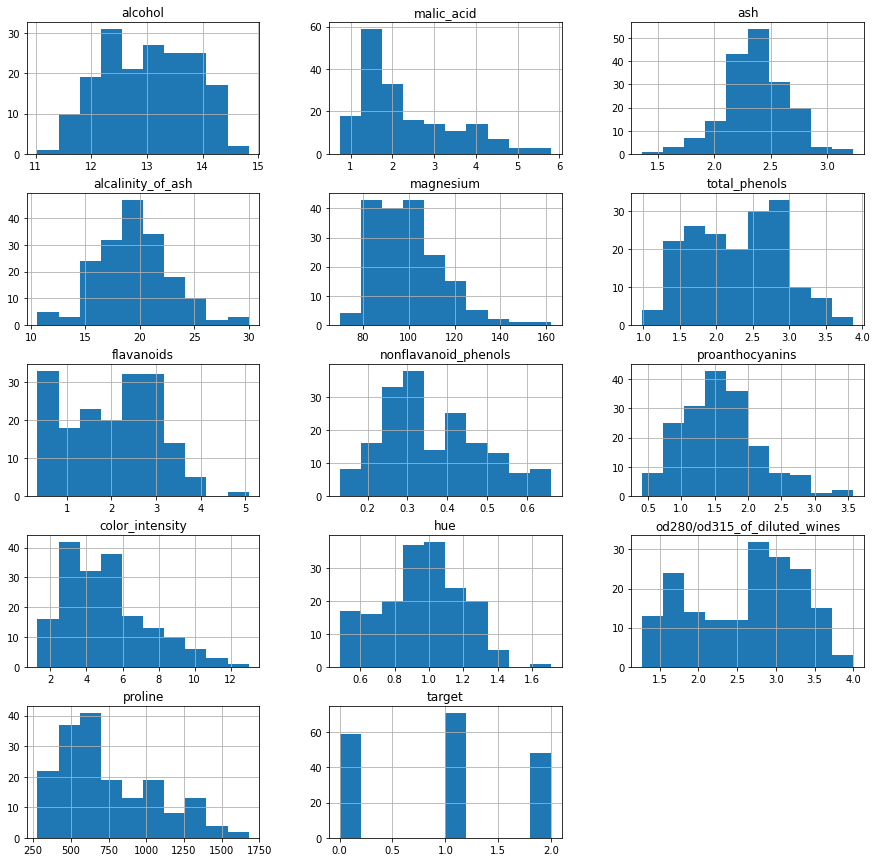

In [9]:
wine_df.hist(figsize=(15, 15), layout=(5,3))



Some features seems to present multimodal distrbutions. However, this can be the results of the overlap of two or more normal distributions. 


Let's check this supposition by plotting distributions for each different type of wine:

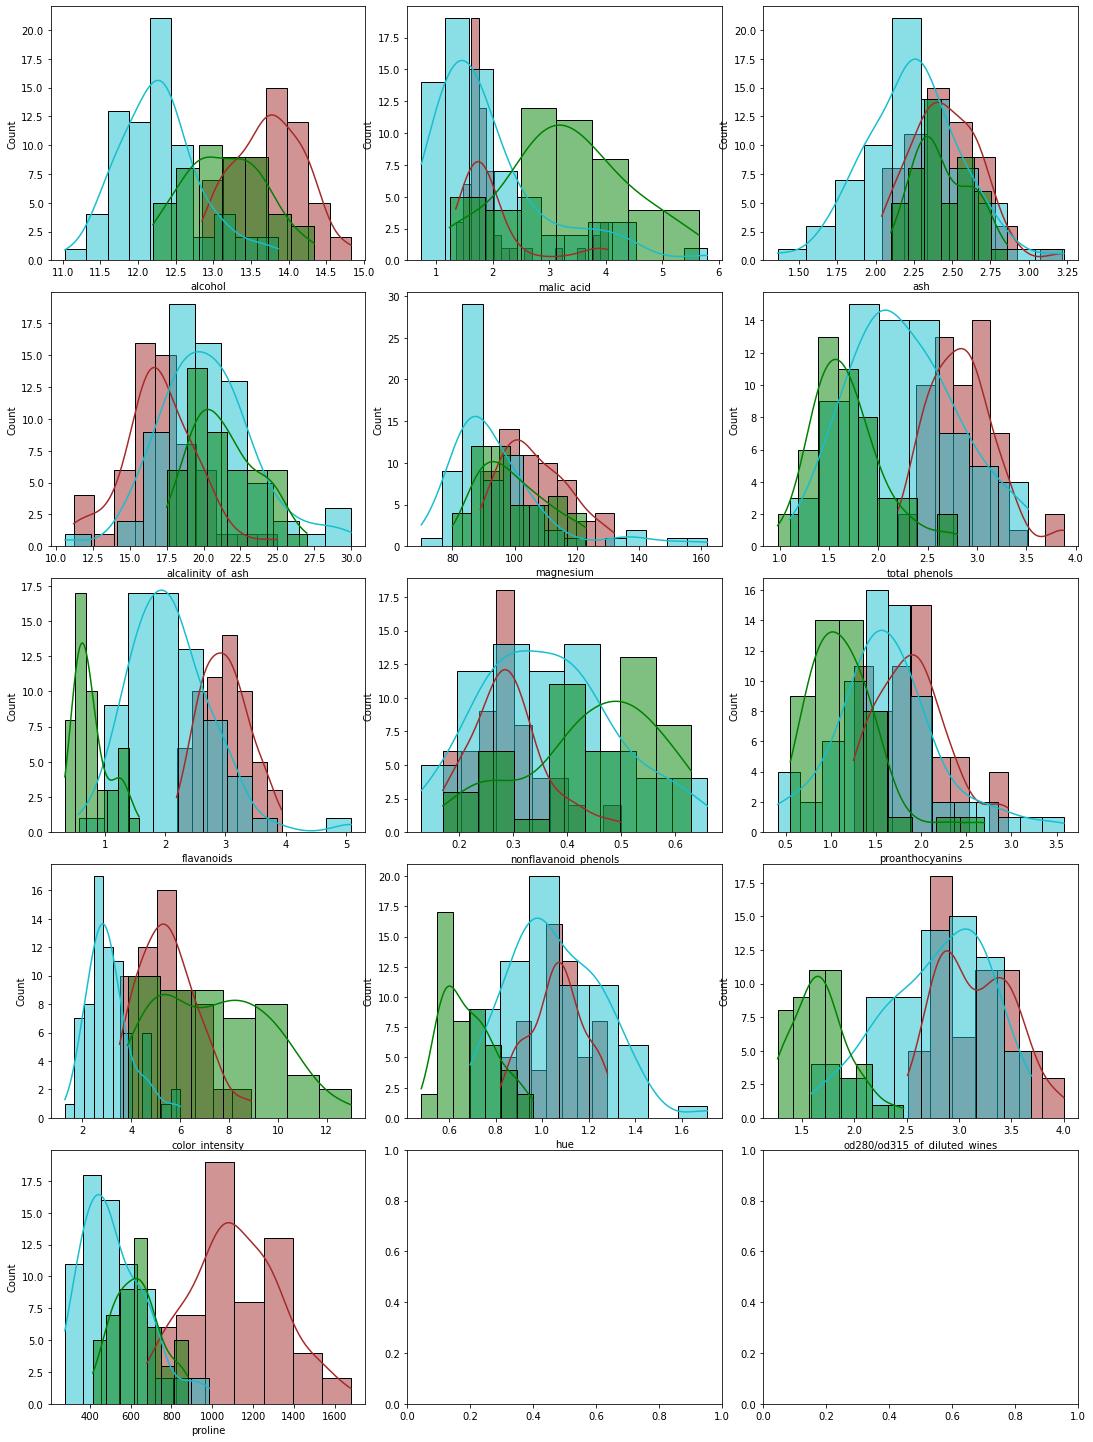

In [10]:
#separating data in three different dataframes, for each class of wine:

wine_0 = wine_df[wine_df['target']==0]
wine_1 = wine_df[wine_df['target']==1]
wine_2 = wine_df[wine_df['target']==2]

#creating a new figure:
fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(15,20))
fig.tight_layout()

#itereation over all columns of the dataframes and the axes of the figure ( .flat is a 1-D iterator over the axes array)
for i, ax in zip(range(len(columns)), axes.flat):
    sns.histplot(wine_0.iloc[:,i], color='brown', ax=ax, kde=True)
    sns.histplot(wine_1.iloc[:,i], color='tab:cyan', ax=ax, kde=True)
    sns.histplot(wine_2.iloc[:,i], color='green', ax=ax, kde=True)
plt.show()

#### From these ditributions, we can observe that:

* **Some features present quite diverse distributions (in terms of mean) for the different wines:**
This could be benefical because it could mean that those features separate well the various classes.

* **Looking at the distributions of each wine, different features have similar distributions:**
This could mean that some features may be related on to another (flavanoids/total phenols or alcohol/proline) and be reduntat for the classification scope.

Similar insights are also observable using boxplots:

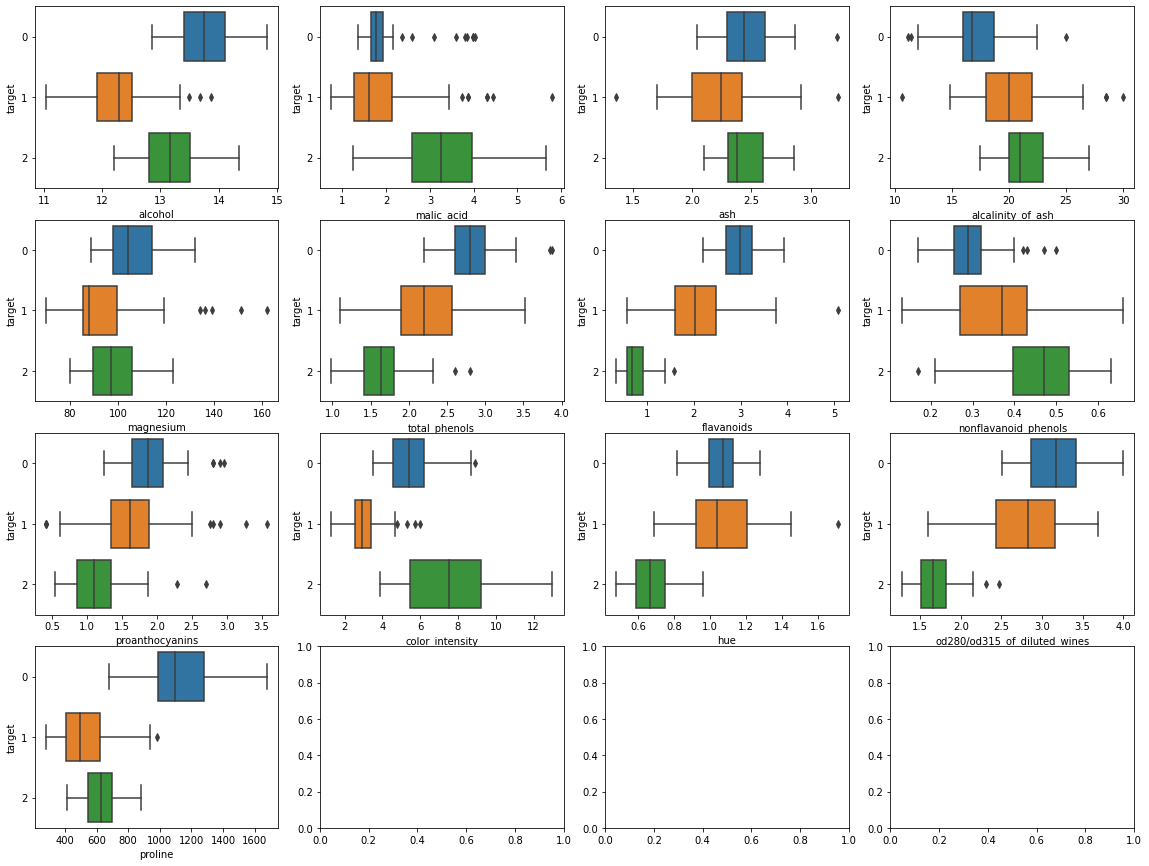

In [11]:
#%matplotlib inline

fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(16,12))
fig.tight_layout()
    
for col, ax in zip(columns, axes.flat):
    sns.boxplot(x = col, y = "target",data=wine_df, orient='h', ax=ax)
plt.show()

#### To verify correlation between features we'll also plot a heatmap of the linear correlations (dataframe.corr()):

Some features have quite high linear correaltion:
* flavanoids / total phenols 0.86
* flavanoids / od280/od315_of_diluted_wines 0.79

For example, if features reduction is needed, we can keep only flavanoids and not use the other two. However, we'll come back to this only if needed.

<AxesSubplot:>

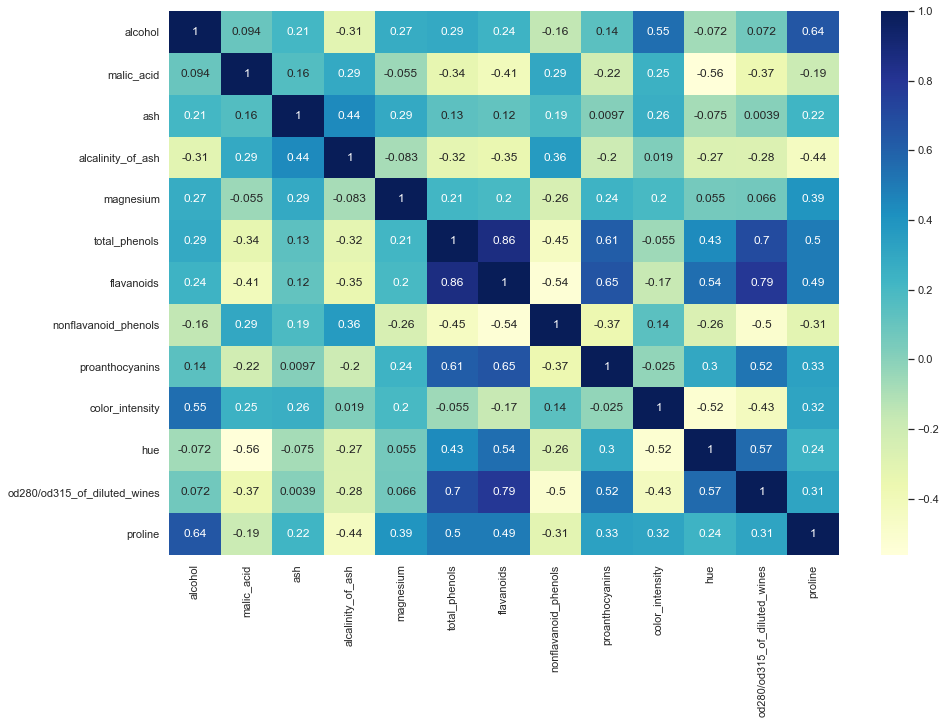

In [12]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(wine_df.iloc[:,:-1].corr(), annot=True, cmap="YlGnBu")

To have a better sense of the correlations let's also pairplot:

In [13]:
#these lines take some times to run. So  they have been commented out, it is possible to remove comments and run, 
#or visualize the wine_pairplot.png that have been saved

#sns.pairplot(wine_df,hue='target', palette= 'tab10')
#plt.savefig('wine_pairplot.png')

The output is a little small and of difficult interpretation, so we save it in a image.png.


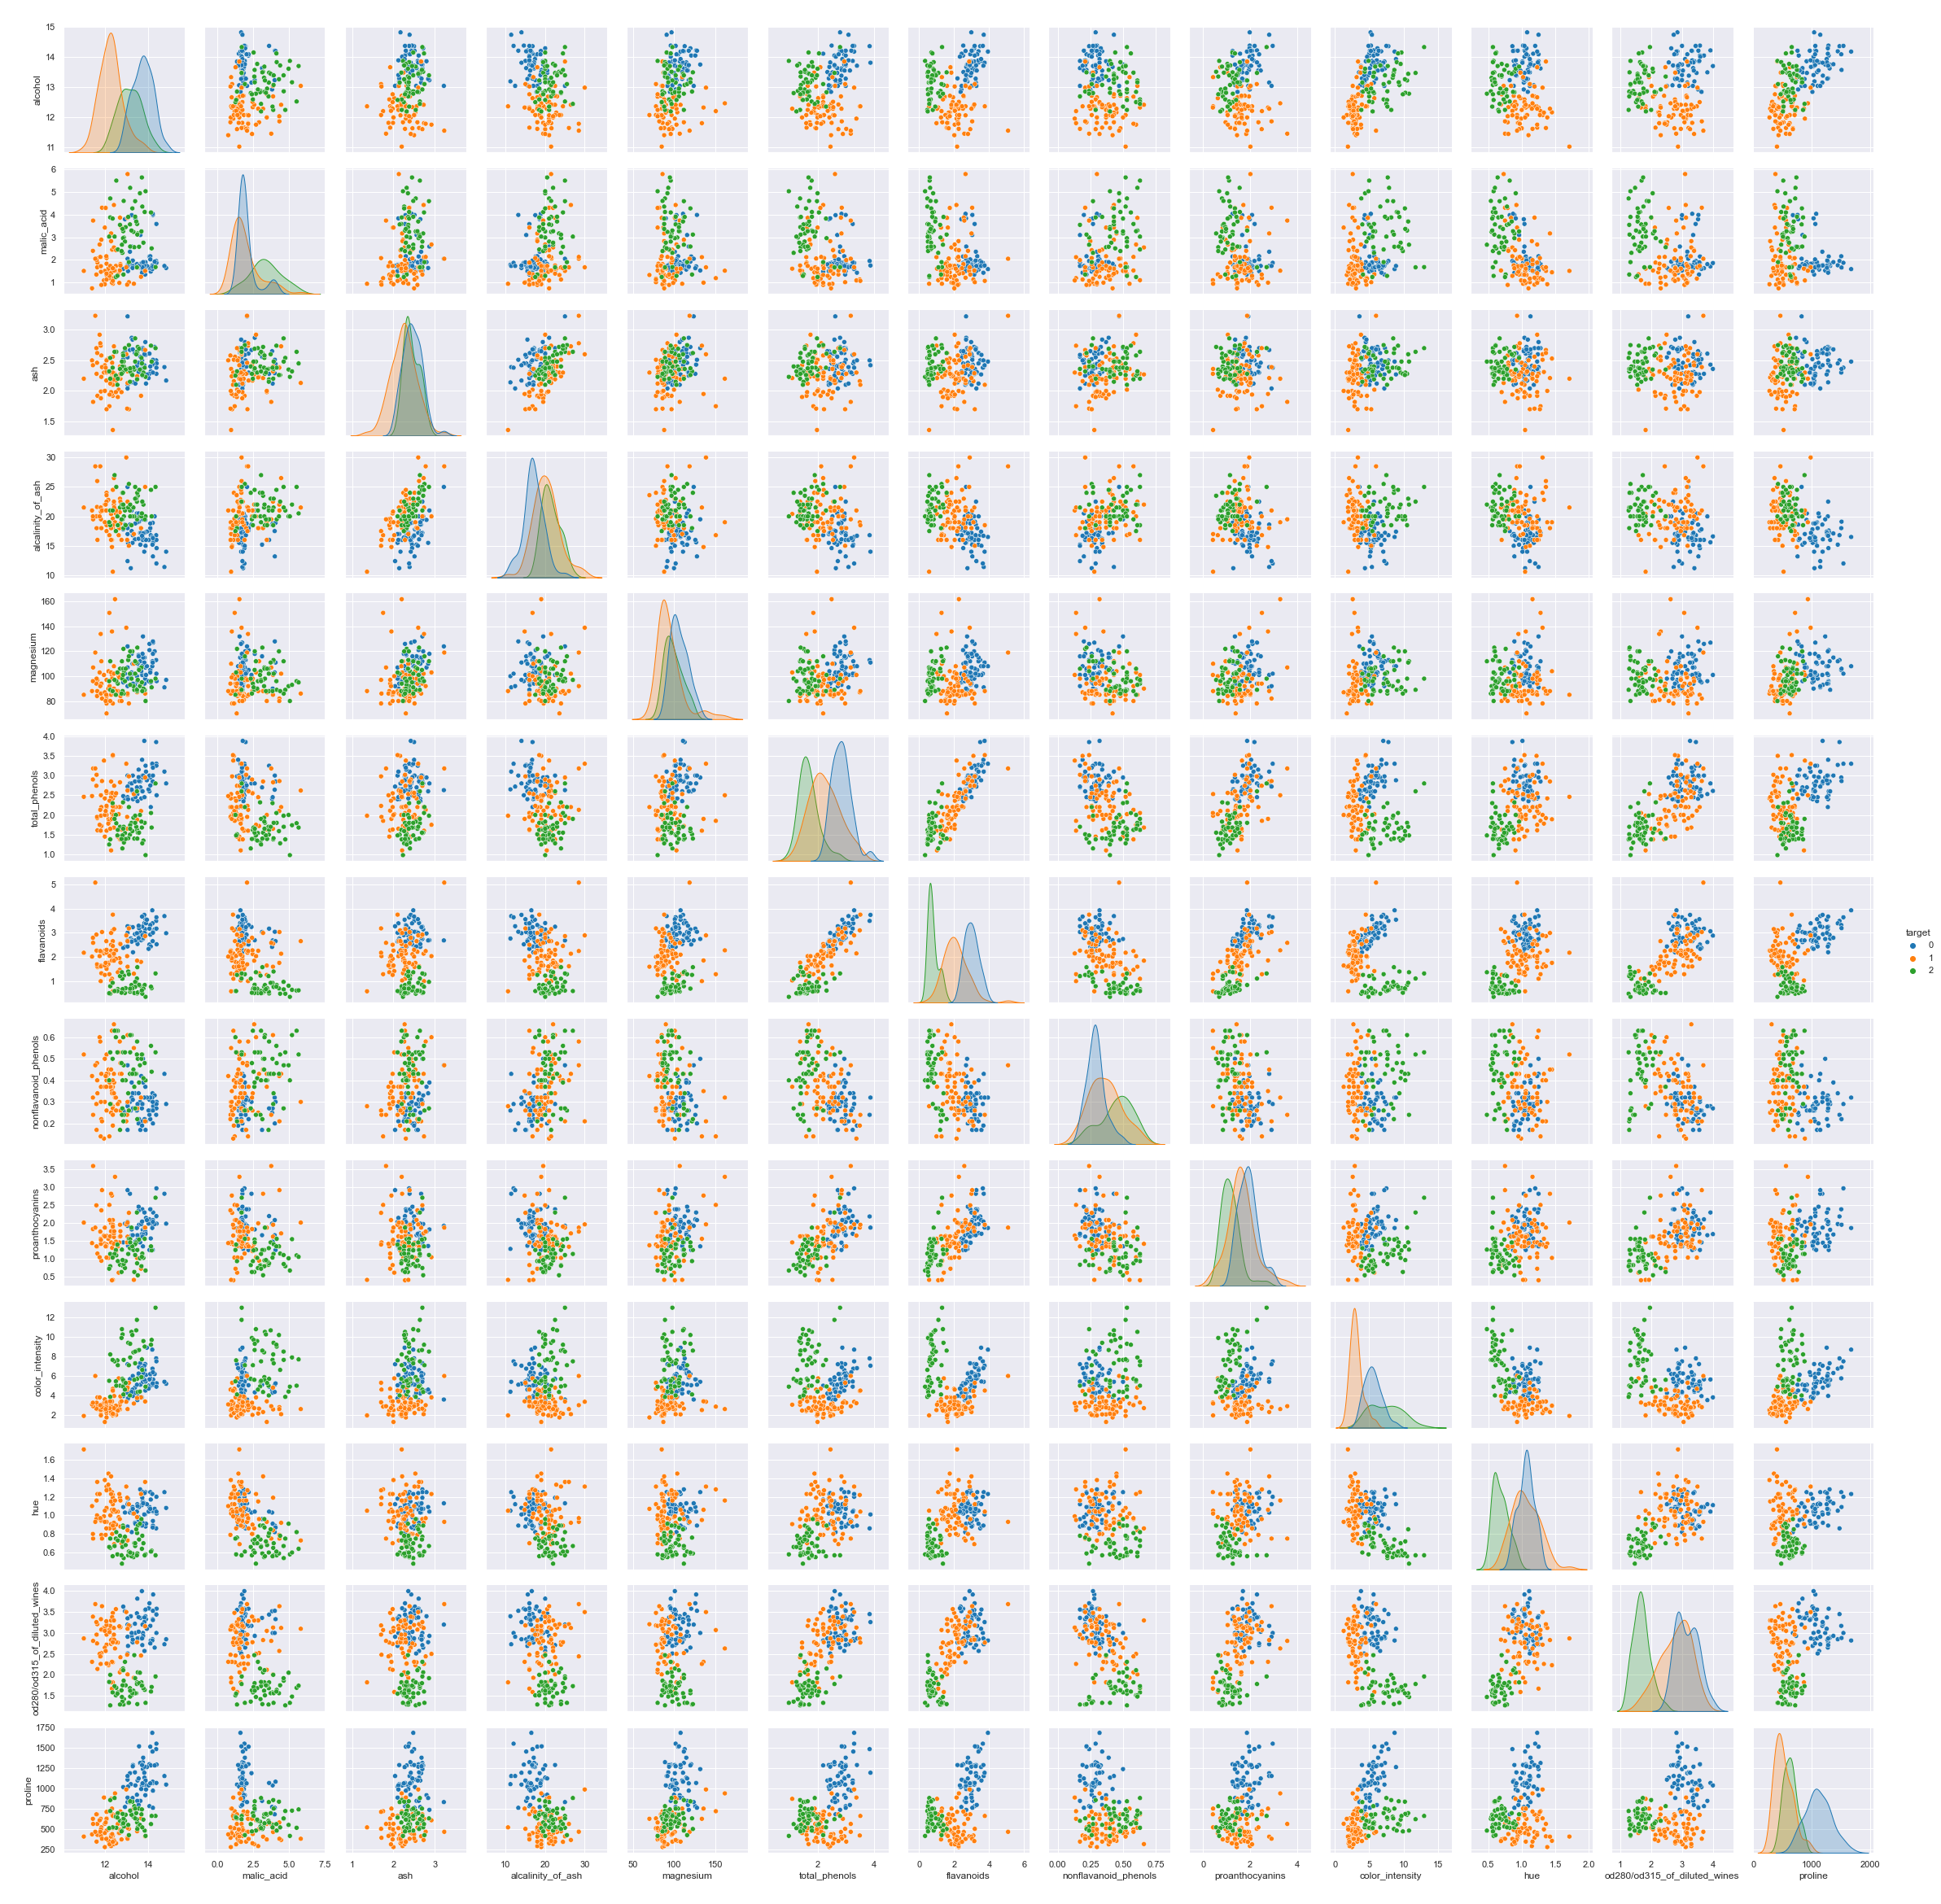


Suggestion: Open the image, it will appear bigger and it will be easier to visualize. 


**Insights:**

We see that some features separate quite well the classes. For example, Proline seems to be a quite explicative variable itself, especially for wine 0 (blue dots). Also color intensity, coupled with total phenols or flavanoids separates quite well the classes.

We will come back to this in case there will be necessity of reduce the number of features and choose the more explicative ones.

Anyhow, we have to remind that those are just '2d' plots and a variable that may not seem explicative, it could be more explicative in other dimensions.

In [14]:
wine_df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [15]:
#wine_df.drop(['ash'], axis=1, inplace=True)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Machine_Learning_Classification

The steps necessaries for this ML classification are:


* Separate features and targets in a 'X' matrix and a 'y' array
* Features Scaling
* Train / Test Set Separation
* Model Choice
* Hyperparameters Tuning
* Prediction
* Model evaluation

#### Data_Preparation_for_Classification

In [16]:
#separation into matrix 'X' of features and array 'y' of targets

X, y = wine_df.iloc[:,:-1], wine_df.iloc[:,-1]

print(type(X), type(y))

y.head()

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [17]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [18]:
#splitting in train / test set

X_train, X_test, y_train, y_test = split(X, y, test_size =.35, random_state=0) 

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(178, 13)
(115, 13)
(63, 13)


In [19]:

#dataset scaling
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_train.columns = wine_df.columns[:-1]

X_test = pd.DataFrame(scaler.transform(X_test))
X_test.columns = wine_df.columns[:-1]

'''
why fit_transform and transform?
https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe#:~:text=These%20learned%20parameters%20are%20then%20used%20to%20scale%20our%20test%20data.&text=The%20fit%20method%20is%20calculating,the%20respective%20mean%20and%20variance.
'''


'\nwhy fit_transform and transform?\nhttps://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe#:~:text=These%20learned%20parameters%20are%20then%20used%20to%20scale%20our%20test%20data.&text=The%20fit%20method%20is%20calculating,the%20respective%20mean%20and%20variance.\n'

In [20]:
X_train.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-0.555811,-0.986931,-0.419820,-0.542027,-1.031616,-0.455441,-1.460709,1.958604,-0.602806,0.202088,-0.916735,-1.552555,-0.327206
1,-0.826287,-0.835601,-1.386839,-0.955560,-1.031616,0.458185,0.514455,-0.578614,0.246977,-0.891717,1.152441,0.176105,-1.048772


In [21]:
X_test.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.956393,-0.604156,-0.419820,-0.845284,1.191543,0.541242,0.925947,-1.233380,0.001847,0.373665,-0.183902,0.822595,1.005416
1,-0.211570,0.286016,0.403937,0.698570,0.787332,-1.319233,-0.658298,-0.987843,-0.586464,2.496934,-2.080646,-1.608772,-0.879756


In [22]:
#y_train
y_test.head()

54     0
151    2
63     1
55     0
123    1
Name: target, dtype: int32

#### Classifier_Choice

Three possible classifiers that can be used are:

* KNN
* Random Forest (preferable to a single tree classifier)
* SVM
* logistic regression

The chosen algorithm is a **Support Vector Machine Classifier**. 
This because after few quick runs it seemed to perform better than the others. Moreover, considering that the dataset is quite small, the training time needed is not particularly big. On the other side, if the dataset was large, then large computational time would have been taken. In that case, it wouldn't be reccomendeed.

In [23]:
model = SVC()
C_range = np.logspace(-1, 2, 4)
gamma_range = np.logspace(-4, 2, 7)
degree_range = np.arange(2,5)

param_grid = [
                {'kernel' : ['linear'], 'C' : C_range},
                {'kernel' : ['rbf'], 'C' : C_range, 'gamma' : gamma_range},
                {'kernel' : ['poly'], 'C' : C_range, 'degree' : degree_range}
            ]



In [24]:
print(C_range)
print(gamma_range)

[  0.1   1.   10.  100. ]
[1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

Hyperparameters meaning:

* **kernel:** type of transformation used by the algorithm (tried: linear, polynomial, radial basis function)
* **C:** *'The C parameter trades off correct classification of training examples against maximization of the decision function's margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy.'*
* **gamma:** *'Defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'.'*

#### Hyperparameters_Tuning_with_GridSearch

In [25]:
print(model.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [26]:
#GridSearch is an exhaustive search over specified parameter values for an estimator
gs = GridSearchCV(model,param_grid, cv=5, verbose=50, scoring= 'accuracy', n_jobs=-1)

In [27]:
#classifier training
gs = gs.fit(X_train, y_train)

Fitting 5 folds for each of 44 candidates, totalling 220 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   

GridSearch results:

In [28]:
#gs.cv_results_

In [29]:
print(gs.best_score_, gs.best_params_)

0.9826086956521738 {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}


In [30]:
#best score:
print('Best score: {:.3f} with {}\n'.format(gs.best_score_, gs.best_params_))

#all scores:
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print('Mean: {:.3f} - Standard Dev.: {:.3f} with: {}'.format(mean, stdev, param))

Best score: 0.983 with {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}

Mean: 0.957 - Standard Dev.: 0.027 with: {'C': 0.1, 'kernel': 'linear'}
Mean: 0.922 - Standard Dev.: 0.051 with: {'C': 1.0, 'kernel': 'linear'}
Mean: 0.922 - Standard Dev.: 0.051 with: {'C': 10.0, 'kernel': 'linear'}
Mean: 0.922 - Standard Dev.: 0.051 with: {'C': 100.0, 'kernel': 'linear'}
Mean: 0.400 - Standard Dev.: 0.017 with: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
Mean: 0.400 - Standard Dev.: 0.017 with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
Mean: 0.417 - Standard Dev.: 0.035 with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
Mean: 0.826 - Standard Dev.: 0.048 with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Mean: 0.400 - Standard Dev.: 0.017 with: {'C': 0.1, 'gamma': 1.0, 'kernel': 'rbf'}
Mean: 0.400 - Standard Dev.: 0.017 with: {'C': 0.1, 'gamma': 10.0, 'kernel': 'rbf'}
Mean: 0.400 - Standard Dev.: 0.017 with: {'C': 0.1, 'gamma': 100.0, 'kernel': 'rbf'}
Mean: 0.400 - Standard Dev.: 0.017 with: {'C': 1.0, '

In [31]:
#from GridSearch we can get the best estimator 

best_model = gs.best_estimator_
 
best_model

SVC(gamma=0.1)

In [32]:
#Predictions on test set
predictions = best_model.predict(X_test)

#with this dataset, with comparable number of exampe for the various classes, accuracy itself is a good indcator
print('Test accuracy:{:.3f}\n'.format(accuracy_score(y_test, predictions)))

#printing classification report
print(classification_report(y_test, predictions))

Test accuracy:0.984

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.96      0.98        25
           2       0.94      1.00      0.97        17

    accuracy                           0.98        63
   macro avg       0.98      0.99      0.98        63
weighted avg       0.99      0.98      0.98        63



Text(0.5, 66.5, 'Actual Values')

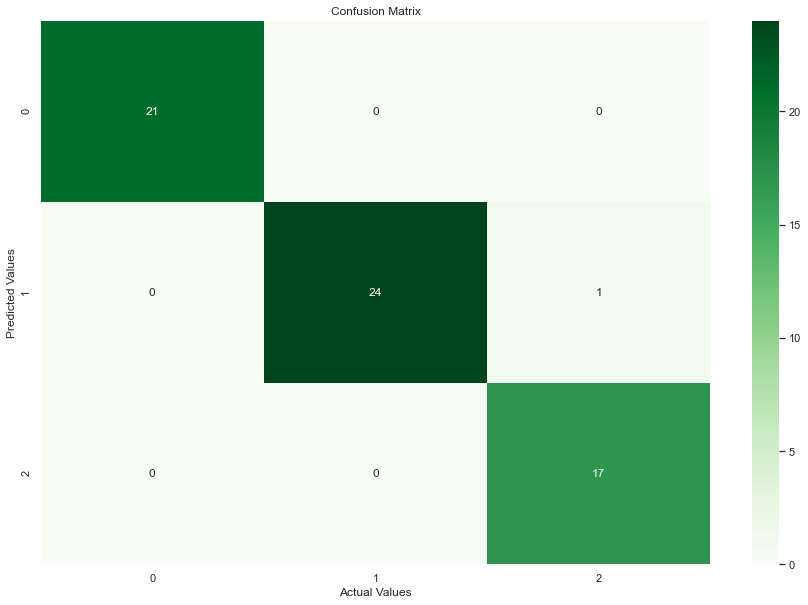

In [33]:
# plot confusion matrix with predictions on test set
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="Greens")

plt.title('Confusion Matrix')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')

### Conclusions

The Classifier seems to perform quite well, even it has been trained with only 115 examples. Only 1 out of 63 examples of the test set has been misclassified.

For this reason, the Model is considered good without the necessity of further manipulations or features reductions.